### STUDY CASE 5
# **NLP FOR SPOTIFY REVIEWS**

TALITHA RAHMADEWATI W (1206220022)
---
<br>

Refernce:
- https://github.com/Eakta08/Sentiment-Analysis-of-Spotify-App-Reviews/blob/main/ML%20model.ipynb
- https://github.com/RadenBimo/NLP-Spotify-Review-Classify/blob/main/final.ipynb
- https://www.kaggle.com/code/avantikab/nlp-basics-spotify-review-analysis
- https://www.kaggle.com/code/harshsingh2209/spotify-reviews-sentiment-analysis/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import string
import re
import emoji
import regex
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

## Loading the Data

In [7]:
url = 'https://raw.githubusercontent.com/talitharhmd/NLP/main/reviews.csv'
reviews = pd.read_csv(url)
reviews

Time_submitted                                             Review  \
0      2022-07-09 15:00:00  Great music service, the audio is high quality...   
1      2022-07-09 14:21:22  Please ignore previous negative rating. This a...   
2      2022-07-09 13:27:32  This pop-up "Get the best Spotify experience o...   
3      2022-07-09 13:26:45    Really buggy and terrible to use as of recently   
4      2022-07-09 13:20:49  Dear Spotify why do I get songs that I didn't ...   
...                    ...                                                ...   
61589  2022-01-01 03:01:29  Even though it was communicated that lyrics fe...   
61590  2022-01-01 02:13:40  Use to be sooo good back when I had it, and wh...   
61591  2022-01-01 01:02:29  This app would be good if not for it taking ov...   
61592  2022-01-01 00:49:23  The app is good hard to navigate and won't jus...   
61593  2022-01-01 00:19:09  Its good but sometimes it doesnt load the musi...   

       Rating  Total_thumbsup Reply  
0           5               2   NaN  
1           5               1   NaN  
2           4               0   NaN  
3           1               1   NaN  
4           1               1   NaN  
...       ...             ...   ...  
61589       1               6   NaN  
61590       1               0   NaN  
61591       2              10   NaN  
61592       2               1   NaN  
61593       4               0   NaN  

[61594 rows x 5 columns]

In [8]:
reviews.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [9]:
print(f'Number of samples: {reviews.shape[0]}\nNumber of features: {reviews.shape[1]}')

Number of samples: 61594
Number of features: 5


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [11]:
reviews['Reply'].unique()

array([nan,
       "Hey, thanks for the feedback! We'd love to help get this sorted. If you haven't tried reinstalling yet, we'd suggest giving it a go. If that doesn’t help, we’d recommend reaching out to our support team by heading to support.spotify.com and searching ‘contact us'.",
       'Hey, thanks for the report. If you haven\'t tried it yet, we\'d suggest clearing the app\'s cache. Just head to Home > Settings (gear icon) > Storage > Delete cache. If that doesn\'t help, we’d recommend reaching out to Customer Service. Just head to support.spotify.com and search "contact us".',
       'Hey, thanks for the feedback! You can always add more tracks to your playlists to replace the ones we recommend. We have more info about this under “Suggested songs” at https://bit.ly/2zw3Xbj.',
       "Hi James! We’re sorry to hear that. We’d love to get some more info from you. If you have the time, give our Customer Service a shout so they can look into this for you. You can find them by headi

# PRE-PROCESSING

In [12]:
# drop unimportant columns
df=reviews[['Review','Rating']]
df

Review  Rating
0      Great music service, the audio is high quality...       5
1      Please ignore previous negative rating. This a...       5
2      This pop-up "Get the best Spotify experience o...       4
3        Really buggy and terrible to use as of recently       1
4      Dear Spotify why do I get songs that I didn't ...       1
...                                                  ...     ...
61589  Even though it was communicated that lyrics fe...       1
61590  Use to be sooo good back when I had it, and wh...       1
61591  This app would be good if not for it taking ov...       2
61592  The app is good hard to navigate and won't jus...       2
61593  Its good but sometimes it doesnt load the musi...       4

[61594 rows x 2 columns]

In [13]:
df=df.drop_duplicates()
df

Review  Rating
0      Great music service, the audio is high quality...       5
1      Please ignore previous negative rating. This a...       5
2      This pop-up "Get the best Spotify experience o...       4
3        Really buggy and terrible to use as of recently       1
4      Dear Spotify why do I get songs that I didn't ...       1
...                                                  ...     ...
61589  Even though it was communicated that lyrics fe...       1
61590  Use to be sooo good back when I had it, and wh...       1
61591  This app would be good if not for it taking ov...       2
61592  The app is good hard to navigate and won't jus...       2
61593  Its good but sometimes it doesnt load the musi...       4

[61393 rows x 2 columns]

## Exploratory Data Analysis

### Counts and Lenght:
Start by checking how long the reviews are
* Character count
* Word count
* Mean word length
* Mean sentence length

In [14]:
lenght = len(df['Review'][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 112


In [15]:
df['Length'] = df['Review'].str.len()
df.head(10)

Review  Rating  Length
0  Great music service, the audio is high quality...       5     112
1  Please ignore previous negative rating. This a...       5      86
2  This pop-up "Get the best Spotify experience o...       4     106
3    Really buggy and terrible to use as of recently       1      47
4  Dear Spotify why do I get songs that I didn't ...       1     100
5  The player controls sometimes disappear for no...       3     114
6  I love the selection and the lyrics are provid...       5      83
7  Still extremely slow when changing storage to ...       3     352
8  It's a great app and the best mp3 music app I ...       5     210
9  I'm deleting this app, for the following reaso...       1     443

In [16]:
grouped_df=df.groupby('Rating')
grouped_df.describe().round()

Length                                                 
          count   mean    std   min    25%    50%    75%     max
Rating                                                          
1       17617.0  198.0  126.0  10.0  103.0  169.0  264.0  3753.0
2        7114.0  210.0  125.0  11.0  113.0  183.0  278.0   909.0
3        6881.0  194.0  122.0  10.0  100.0  165.0  258.0  1104.0
4        7831.0  160.0  114.0  10.0   75.0  128.0  213.0  1192.0
5       21950.0  113.0   92.0  10.0   51.0   83.0  144.0   517.0

Dari statistik di atas kita dapat melihat bahwa orang yang memberikan penilaian positif (4-5) cenderung membuat durasi yang lebih pendek dibandingkan dengan penilaian netral (3) dan penilaian buruk (1-2).


In [17]:
df

Review  Rating  Length
0      Great music service, the audio is high quality...       5     112
1      Please ignore previous negative rating. This a...       5      86
2      This pop-up "Get the best Spotify experience o...       4     106
3        Really buggy and terrible to use as of recently       1      47
4      Dear Spotify why do I get songs that I didn't ...       1     100
...                                                  ...     ...     ...
61589  Even though it was communicated that lyrics fe...       1     279
61590  Use to be sooo good back when I had it, and wh...       1     263
61591  This app would be good if not for it taking ov...       2     493
61592  The app is good hard to navigate and won't jus...       2     272
61593  Its good but sometimes it doesnt load the musi...       4     216

[61393 rows x 3 columns]

#### **Word Count**: Number of words in a review

In [18]:
word_count = df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 21


In [19]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

df['Word_count'] = df['Review'].apply(word_count)
df.head(10)

Review  Rating  Length  \
0  Great music service, the audio is high quality...       5     112   
1  Please ignore previous negative rating. This a...       5      86   
2  This pop-up "Get the best Spotify experience o...       4     106   
3    Really buggy and terrible to use as of recently       1      47   
4  Dear Spotify why do I get songs that I didn't ...       1     100   
5  The player controls sometimes disappear for no...       3     114   
6  I love the selection and the lyrics are provid...       5      83   
7  Still extremely slow when changing storage to ...       3     352   
8  It's a great app and the best mp3 music app I ...       5     210   
9  I'm deleting this app, for the following reaso...       1     443   

   Word_count  
0          21  
1          15  
2          19  
3           9  
4          21  
5          19  
6          15  
7          62  
8          43  
9          80

#### **Mean word length**: Average length of words

In [20]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head(10)

Review  Rating  Length  \
0  Great music service, the audio is high quality...       5     112   
1  Please ignore previous negative rating. This a...       5      86   
2  This pop-up "Get the best Spotify experience o...       4     106   
3    Really buggy and terrible to use as of recently       1      47   
4  Dear Spotify why do I get songs that I didn't ...       1     100   
5  The player controls sometimes disappear for no...       3     114   
6  I love the selection and the lyrics are provid...       5      83   
7  Still extremely slow when changing storage to ...       3     352   
8  It's a great app and the best mp3 music app I ...       5     210   
9  I'm deleting this app, for the following reaso...       1     443   

   Word_count  mean_word_length  
0          21          4.380952  
1          15          4.800000  
2          19          4.631579  
3           9          4.333333  
4          21          3.809524  
5          19          5.052632  
6          15          4.600000  
7          62          4.693548  
8          43          3.906977  
9          80          4.550000

#### **Mean sentence length**: Average length of the sentences in the review

In [21]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

55.5

In [22]:
df['mean_sent_length'] = df['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head(10)

Review  Rating  Length  \
0  Great music service, the audio is high quality...       5     112   
1  Please ignore previous negative rating. This a...       5      86   
2  This pop-up "Get the best Spotify experience o...       4     106   
3    Really buggy and terrible to use as of recently       1      47   
4  Dear Spotify why do I get songs that I didn't ...       1     100   
5  The player controls sometimes disappear for no...       3     114   
6  I love the selection and the lyrics are provid...       5      83   
7  Still extremely slow when changing storage to ...       3     352   
8  It's a great app and the best mp3 music app I ...       5     210   
9  I'm deleting this app, for the following reaso...       1     443   

   Word_count  mean_word_length  mean_sent_length  
0          21          4.380952         55.500000  
1          15          4.800000         28.000000  
2          19          4.631579         52.500000  
3           9          4.333333         47.000000  
4          21          3.809524         49.500000  
5          19          5.052632         56.500000  
6          15          4.600000         83.000000  
7          62          4.693548         87.250000  
8          43          3.906977         69.333333  
9          80          4.550000         87.800000

In [23]:
fig = px.pie(df, names='Rating').update_traces(sort=False)
fig.show()

In [24]:
# Top used 100 Words before Text Cleaning
FreqOfWords = df['Review'].str.split(expand=True).stack().value_counts()
FreqOfWords_top100 = FreqOfWords[:100]

fig = px.treemap(FreqOfWords_top100, path=[FreqOfWords_top100.index], values=0)
fig.update_layout(title_text='Top used 100 Words before Text Cleaning',
                  title_x=0.5, title_font=dict(size=18)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

## Text Processing

in this project we will preprocess our data with some technique:
* Cleaning 
* Expanding Contractions
* Remove Punctuations, Emoji, Stopwords
* Tokenization
* Stop word removal
* Stemming/lemmatization

In [26]:
# drop unimportant columns
df2=df[['Review','Rating']]
df2['Review'][4]

"Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?"

In [24]:
pip install emoji


Note: you may need to restart the kernel to use updated packages.


In [27]:
nltk.download('wordnet')
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### 1. Expanding contractions:

In [28]:
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what's": "what is",
    "when's": "when is",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contractions_dict):
    if not isinstance(text, str):
        return text
    words = text.split()
    return " ".join([contractions_dict.get(word.lower(), word) for word in words])


df2["Review"] = df2["Review"].apply(lambda x: expand_contractions(x, contractions_dict))
df2.head(10)


Review  Rating
0  Great music service, the audio is high quality...       5
1  Please ignore previous negative rating. This a...       5
2  This pop-up "Get the best Spotify experience o...       4
3    Really buggy and terrible to use as of recently       1
4  Dear Spotify why do I get songs that I did not...       1
5  The player controls sometimes disappear for no...       3
6  I love the selection and the lyrics are provid...       5
7  Still extremely slow when changing storage to ...       3
8  it is a great app and the best mp3 music app I...       5
9  I'm deleting this app, for the following reaso...       1

### 2. Lowercase:

In [27]:
df2['Review'] = df2['Review'].str.lower()
df2.head(5)

Review  Rating
0  great music service, the audio is high quality...       5
1  please ignore previous negative rating. this a...       5
2  this pop-up "get the best spotify experience o...       4
3    really buggy and terrible to use as of recently       1
4  dear spotify why do i get songs that i did not...       1

### 3. Remove punctuations:

In [28]:
import re
df2['Review'] = df2['Review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df2


Review  Rating
0      great music service the audio is high quality ...       5
1      please ignore previous negative rating this ap...       5
2      this popup get the best spotify experience on ...       4
3        really buggy and terrible to use as of recently       1
4      dear spotify why do i get songs that i did not...       1
...                                                  ...     ...
61589  even though it was communicated that lyrics fe...       1
61590  use to be sooo good back when i had it and whe...       1
61591  this app would be good if not for it taking ov...       2
61592  the app is good hard to navigate and will not ...       2
61593  its good but sometimes it doesnt load the musi...       4

[61393 rows x 2 columns]

### 4. Remove Emoticons:

In [ ]:
tokenizer = TweetTokenizer()

def emoji_handling(text, remove_emoji=False):
    emoji_list = []
    word_list = []
    words = regex.findall(r'\X', text)
    for word in words:
        if emoji.is_emoji(word):
            emoji_list.append(word)
        else:
            word_list.append(word)
    word_str = "".join(word_list)
    emoji_str = " ".join(emoji_list)
    return word_str if remove_emoji else f"{word_str} {emoji_str}"

In [30]:
def preprocess(text, remove_emoji=False, exceptions=[]):
    text = emoji_handling(text, remove_emoji=remove_emoji)
    return text

df2['Review'] = df2['Review'].apply(lambda x: preprocess(x, remove_emoji=False))
df2

Review  Rating
0      great music service the audio is high quality ...       5
1      please ignore previous negative rating this ap...       5
2      this popup get the best spotify experience on ...       4
3       really buggy and terrible to use as of recently        1
4      dear spotify why do i get songs that i did not...       1
...                                                  ...     ...
61589  even though it was communicated that lyrics fe...       1
61590  use to be sooo good back when i had it and whe...       1
61591  this app would be good if not for it taking ov...       2
61592  the app is good hard to navigate and will not ...       2
61593  its good but sometimes it doesnt load the musi...       4

[61393 rows x 2 columns]

### 5. Removing stopwords:

In [31]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df2['Review'] = df2['Review'].apply(lambda x: remove_stopwords(x))
df2



Review  Rating
0      great music service audio high quality app eas...       5
1      please ignore previous negative rating app sup...       5
2      popup get best spotify experience android 12 a...       4
3                     really buggy terrible use recently       1
4       dear spotify get songs put playlist shuffle play       1
...                                                  ...     ...
61589  even though communicated lyrics feature availa...       1
61590  use sooo good back downloaded free version cou...       1
61591  app would good taking device start comp spotif...       2
61592  app good hard navigate let play song click pla...       2
61593  good sometimes doesnt load music plays like 8 ...       4

[61393 rows x 2 columns]

### 6. Tokenization

In [32]:
def corpus(text):
    text_list = text.split()
    return text_list

df2['Review_lists'] = df2['Review'].apply(corpus)
df2.head(10)

Review  Rating  \
0  great music service audio high quality app eas...       5   
1  please ignore previous negative rating app sup...       5   
2  popup get best spotify experience android 12 a...       4   
3                 really buggy terrible use recently       1   
4   dear spotify get songs put playlist shuffle play       1   
5  player controls sometimes disappear reason app...       3   
6      love selection lyrics provided song listening       5   
7  still extremely slow changing storage external...       3   
8  great app best mp3 music app ever used one pro...       5   
9  im deleting app following reasons app failing ...       1   

                                        Review_lists  
0  [great, music, service, audio, high, quality, ...  
1  [please, ignore, previous, negative, rating, a...  
2  [popup, get, best, spotify, experience, androi...  
3           [really, buggy, terrible, use, recently]  
4  [dear, spotify, get, songs, put, playlist, shu...  
5  [player, controls, sometimes, disappear, reaso...  
6  [love, selection, lyrics, provided, song, list...  
7  [still, extremely, slow, changing, storage, ex...  
8  [great, app, best, mp3, music, app, ever, used...  
9  [im, deleting, app, following, reasons, app, f...

In [33]:
from tqdm import trange

corpus = []
for i in trange(df2.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df2['Review_lists'].iloc[i]  
print(f"Total words in corpus: {len(corpus)}")


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61393/61393 [00:00<00:00, 115956.35it/s]

Total words in corpus: 1003211


In [34]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('app', 35519),
 ('music', 25341),
 ('spotify', 18754),
 ('songs', 18205),
 ('song', 14675),
 ('play', 11307),
 ('like', 9762),
 ('listen', 9323),
 ('love', 8964),
 ('premium', 8927)]

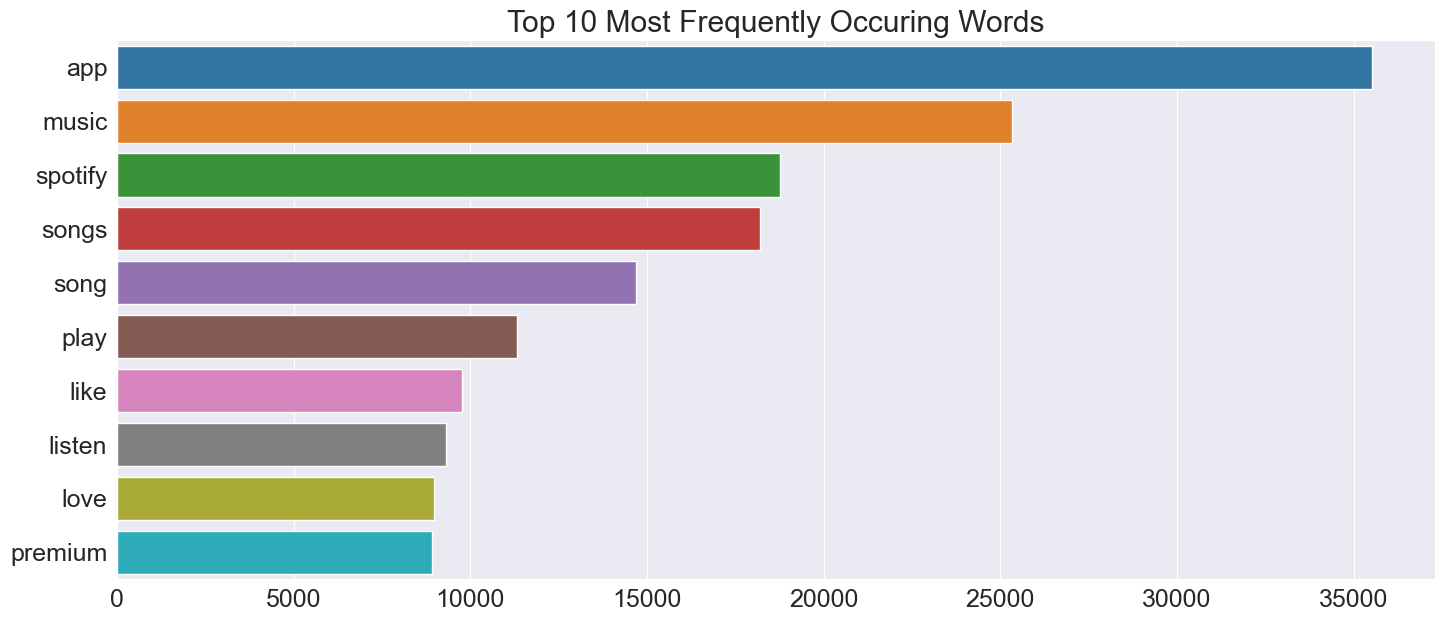

In [35]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [36]:
df_split = df2['Review_lists']
df_split = pd.DataFrame(df_split.tolist())

FreqOfWords = df_split.stack().value_counts()  
FreqOfWords_top100 = FreqOfWords[:100]  

fig = px.treemap(FreqOfWords_top100, path=[FreqOfWords_top100.index], values=0)
fig.update_layout(
    title_text='Top 100 Words After Text Cleaning',  
    title_x=0.5, 
    title_font=dict(size=18)  
)
fig.update_traces(textinfo="label+value")  
fig.show()

### 7. Lemmatization

In [37]:
from nltk.stem import PorterStemmer
lemmat = WordNetLemmatizer()

df2['Review'] = df2['Review'].apply(lambda review: " ".join([lemmat.lemmatize(word) for word in review.split()]))
df2

Review  Rating  \
0      great music service audio high quality app eas...       5   
1      please ignore previous negative rating app sup...       5   
2      popup get best spotify experience android 12 a...       4   
3                     really buggy terrible use recently       1   
4        dear spotify get song put playlist shuffle play       1   
...                                                  ...     ...   
61589  even though communicated lyric feature availab...       1   
61590  use sooo good back downloaded free version cou...       1   
61591  app would good taking device start comp spotif...       2   
61592  app good hard navigate let play song click pla...       2   
61593  good sometimes doesnt load music play like 8 s...       4   

                                            Review_lists  
0      [great, music, service, audio, high, quality, ...  
1      [please, ignore, previous, negative, rating, a...  
2      [popup, get, best, spotify, experience, androi...  
3               [really, buggy, terrible, use, recently]  
4      [dear, spotify, get, songs, put, playlist, shu...  
...                                                  ...  
61589  [even, though, communicated, lyrics, feature, ...  
61590  [use, sooo, good, back, downloaded, free, vers...  
61591  [app, would, good, taking, device, start, comp...  
61592  [app, good, hard, navigate, let, play, song, c...  
61593  [good, sometimes, doesnt, load, music, plays, ...  

[61393 rows x 3 columns]

In [38]:
def transform_ratings(rating):
    if rating < 3:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive
    
df2['label'] = df2['Rating'].apply(transform_ratings)
df2['length'] = df2['Review'].str.len()
df2.head(10)

Review  Rating  \
0  great music service audio high quality app eas...       5   
1  please ignore previous negative rating app sup...       5   
2  popup get best spotify experience android 12 a...       4   
3                 really buggy terrible use recently       1   
4    dear spotify get song put playlist shuffle play       1   
5  player control sometimes disappear reason app ...       3   
6       love selection lyric provided song listening       5   
7  still extremely slow changing storage external...       3   
8  great app best mp3 music app ever used one pro...       5   
9  im deleting app following reason app failing b...       1   

                                        Review_lists  label  length  
0  [great, music, service, audio, high, quality, ...      2      79  
1  [please, ignore, previous, negative, rating, a...      2      69  
2  [popup, get, best, spotify, experience, androi...      2      74  
3           [really, buggy, terrible, use, recently]      0      34  
4  [dear, spotify, get, songs, put, playlist, shu...      0      47  
5  [player, controls, sometimes, disappear, reaso...      1      79  
6  [love, selection, lyrics, provided, song, list...      2      44  
7  [still, extremely, slow, changing, storage, ex...      1     236  
8  [great, app, best, mp3, music, app, ever, used...      2     114  
9  [im, deleting, app, following, reasons, app, f...      0     248

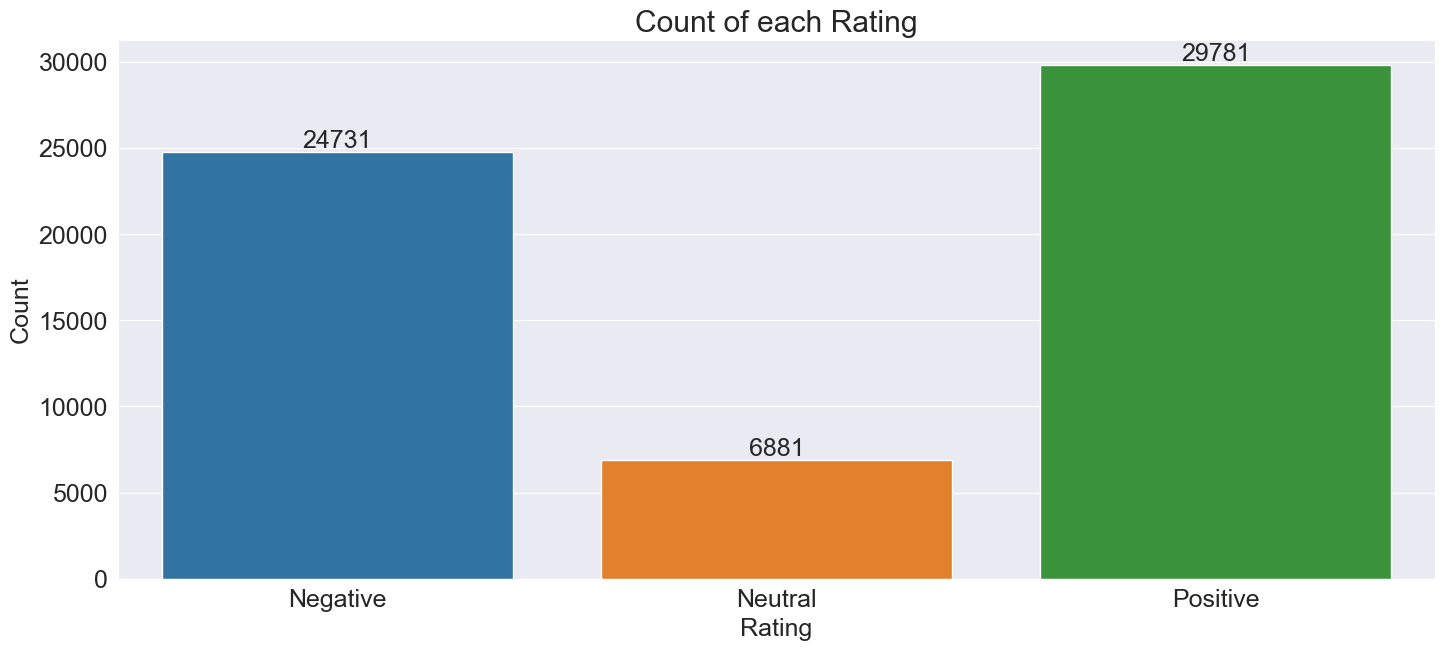

In [39]:
rate=df2.label.value_counts()
ax=sns.barplot(x=rate.index,y=rate.values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('Count of each Rating')
plt.show()

Data sentimen ulasan Spotify terbagi menjadi tiga kategori berdasarkan Rating:
* Positif: Sebanyak 29.781 ulasan (48,5% dari total), menunjukkan sebagian besar pengguna memberikan ulasan yang baik.
* Negatif: Sebanyak 24.731 ulasan (40,3% dari total), menunjukkan ulasan kritis yang signifikan.
* Netral: Sebanyak 6.881 ulasan (11,2% dari total), mencerminkan opini yang tidak terlalu condong ke arah positif atau negatif.


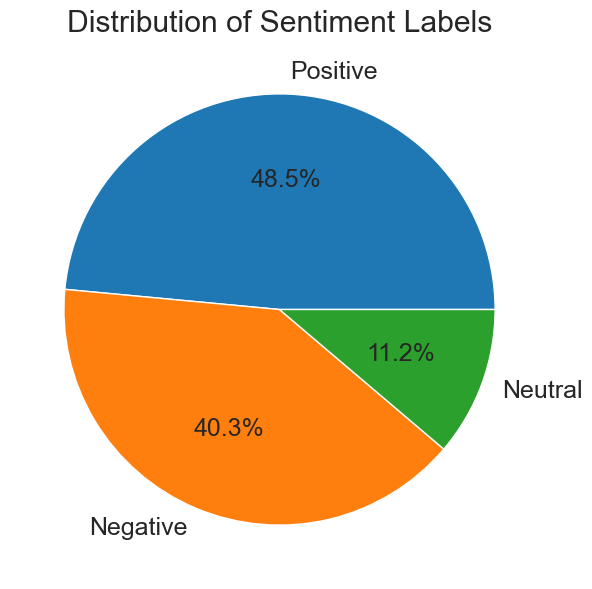

In [44]:
plt.pie(df2['label'].value_counts(), labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%')
plt.title('Distribution of Sentiment Labels')
plt.show()

Sentimen positif memiliki proporsi terbesar (48,5%), diikuti oleh sentimen negatif (40,3%), dan sentimen netral menjadi bagian terkecil (11,2%).

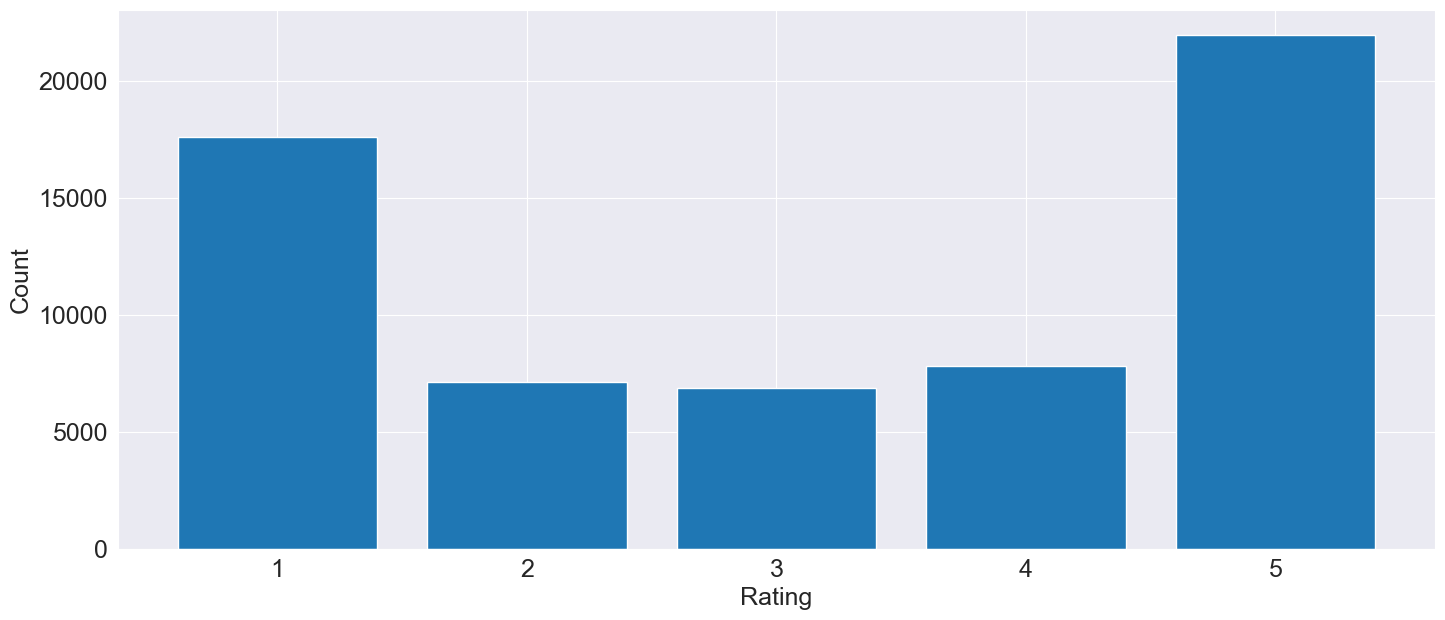

In [45]:
rating_counts = df2['Rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('')
plt.show()

Mayoritas ulasan Spotify bersentimen positif, menunjukkan banyak pengguna merasa puas dengan layanan Spotify. Namun, proporsi ulasan negatif yang cukup besar (40,3%) mengindikasikan adanya area yang perlu ditingkatkan. Sementara itu, ulasan netral menunjukkan sebagian kecil pengguna memberikan opini yang tidak ekstrem.

## Most Frequently occuring N_grams

**What is an N-gram?** <br>
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.
<br>
> A **Bi-gram** means two words in a sequence. 'Very good' or 'Too great'<br>
> A **Tri-gram** means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.<br>

For separating text into n-grams, we will use `CountVectorizer` from Sklearn

In [46]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df2['Review'])
bigrams

<61393x324435 sparse matrix of type '<class 'numpy.int64'>'
	with 906247 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

count_values = np.array(bigrams.sum(axis=0)).flatten()
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

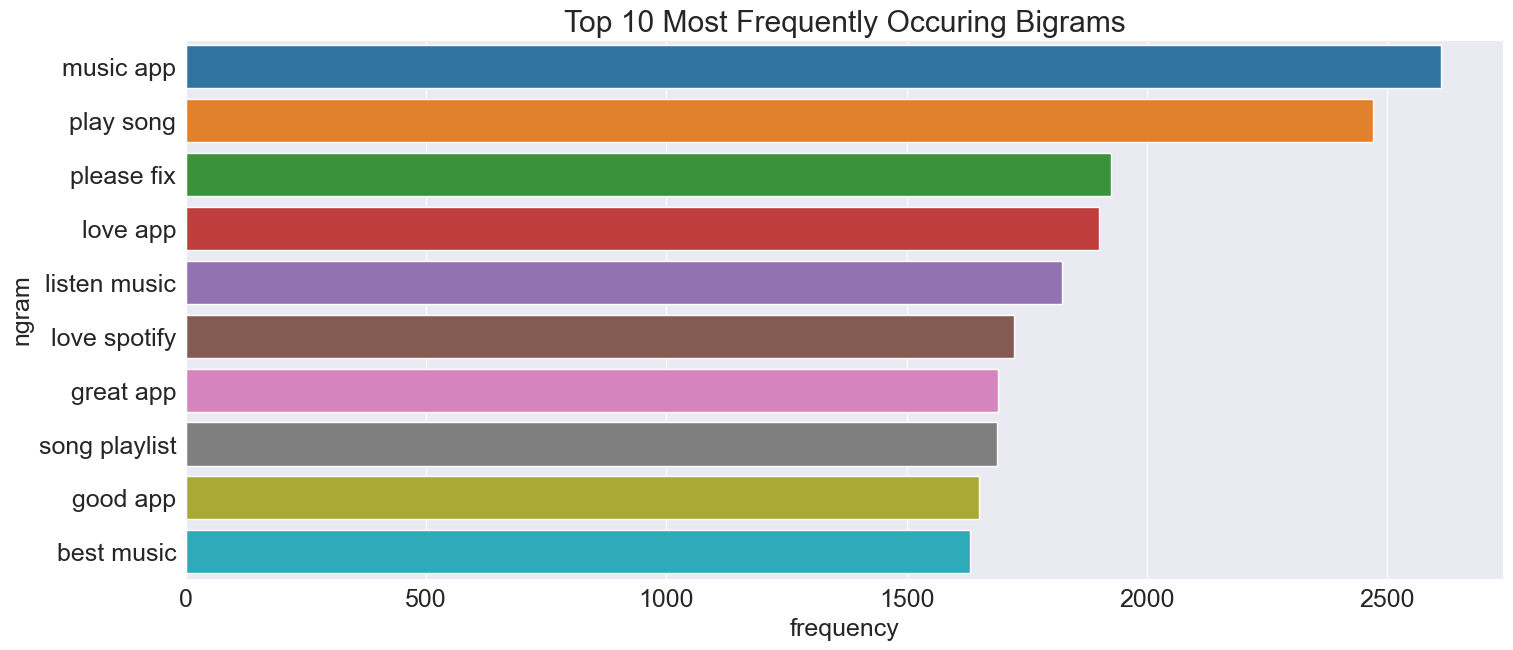

In [48]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

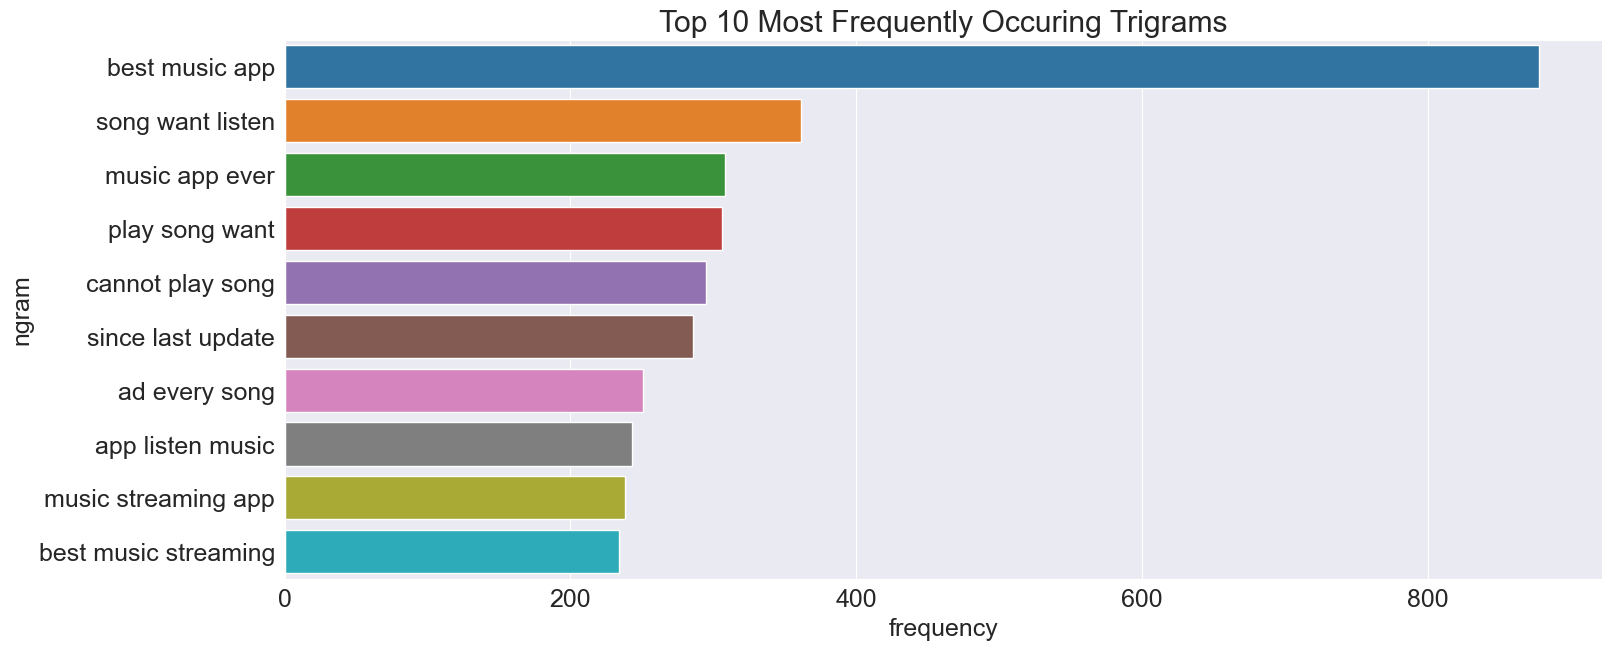

In [49]:
cv1 = CountVectorizer(ngram_range=(3, 3))
trigrams = cv1.fit_transform(df2['Review'])
count_values = np.array(trigrams.sum(axis=0)).flatten()

ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse=True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

# Work Cloud

In [40]:
pip install wordcloud

In [50]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import requests

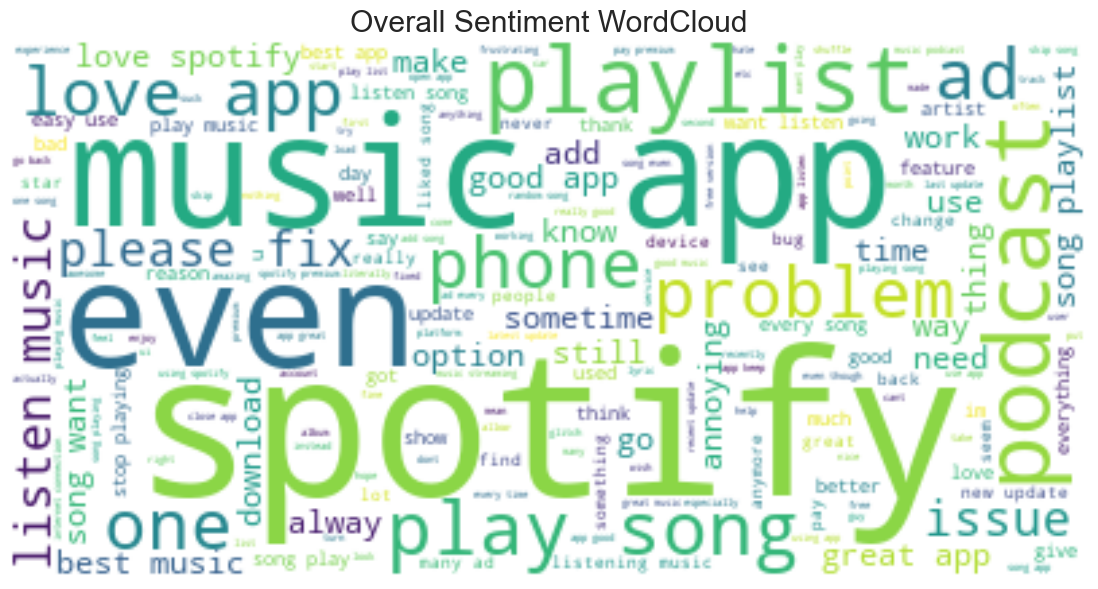

In [51]:
text=" ".join([sen for sen in df2.Review])
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Overall Sentiment WordCloud")
plt.show()

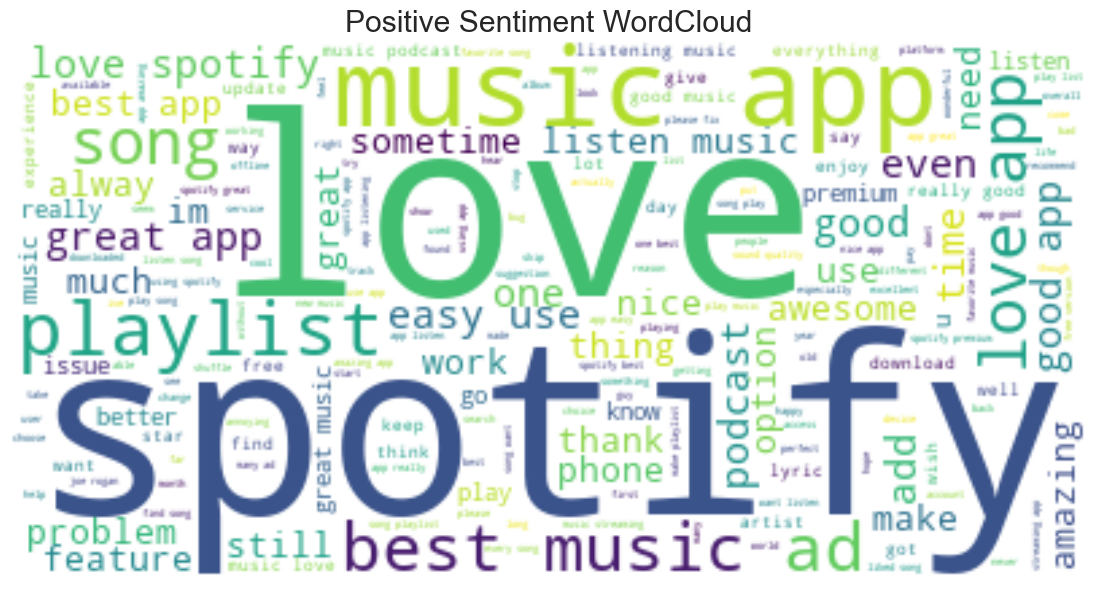

In [54]:
positive=' '.join(word for word in df2['Review'][df2['label']==2].astype(str))
wordcloud = WordCloud(background_color = 'white').generate(positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment WordCloud")
plt.show()

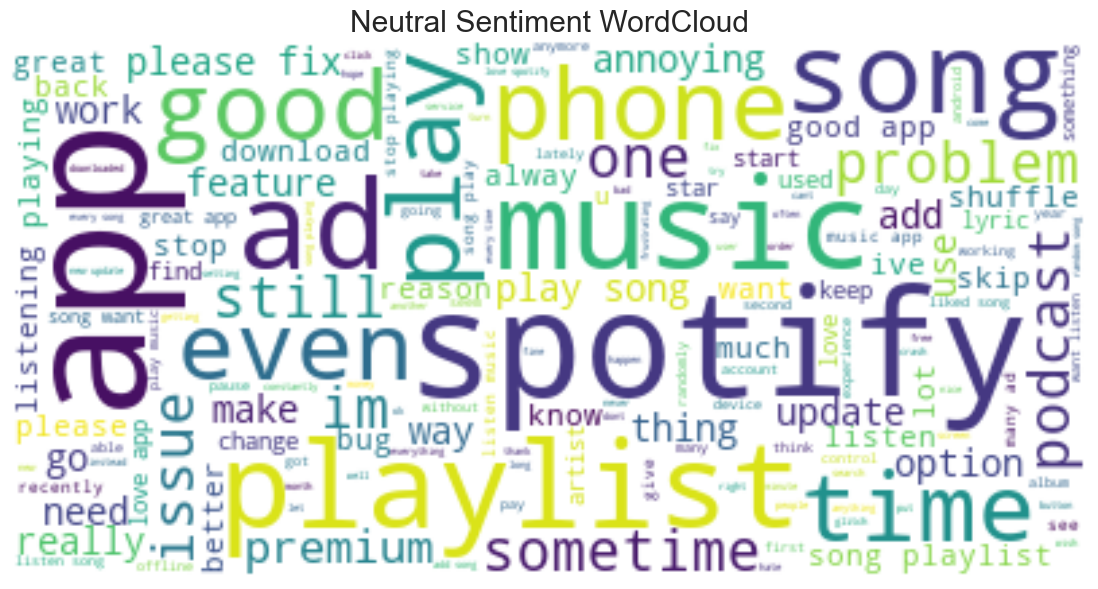

In [55]:
neutral=' '.join(word for word in df2['Review'][df2['label']==1].astype(str))
wordcloud = WordCloud(background_color = 'white').generate(neutral)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Sentiment WordCloud")
plt.show()

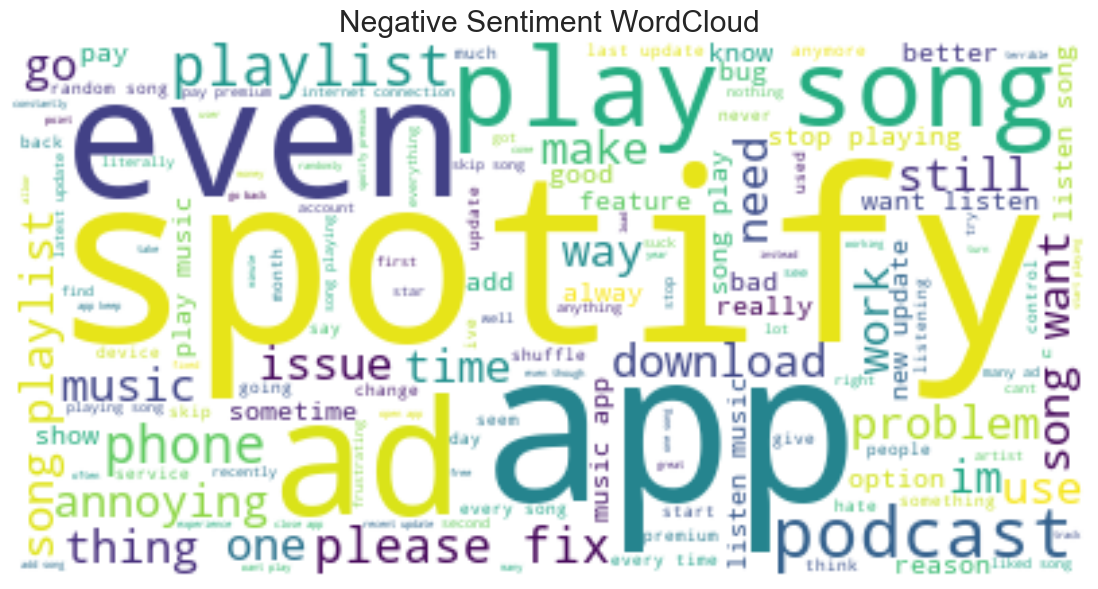

In [56]:
negative=' '.join(word for word in df2['Review'][df2['label']==0].astype(str))
wordcloud = WordCloud(background_color = 'white').generate(negative)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment WordCloud")
plt.show()

## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

X = df2['Review']
y = df2.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, shuffle=True)

In [59]:
X_train

45608    free version really suck super bad experience ...
32051    issue lately playing longer show closing app c...
5480        love app search fav song click song gonna play
2818     took premium still cannot download episode can...
29060    longtime user lately playing bar show im tired...
                               ...                        
12167    amazing app support team reply fast take le 2 ...
57390    good use time one thing repeat button really b...
14206                         love free music ad hard deal
56287    spotify support misinformation pay quit paid s...
38604    new update broke music controller click music ...
Name: Review, Length: 46044, dtype: object

In [60]:
y_train

45608    0
32051    0
5480     0
2818     2
29060    0
        ..
12167    2
57390    2
14206    2
56287    0
38604    1
Name: label, Length: 46044, dtype: int64

## Model Selection

In [61]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [62]:
acc=pd.DataFrame({'Model':[],'Training Accuracy':[],'Testing Accuracy':[],'Cross validation Score':[]})
acc

Empty DataFrame
Columns: [Model, Training Accuracy, Testing Accuracy, Cross validation Score]
Index: []

In [63]:
def report(model,model_name,i,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    y_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    train_acc=accuracy_score(y_train,y_train_pred)
    test_acc=accuracy_score(y_test,y_pred)
    cross_val=cross_val_score(model,X_train,y_train,cv=5).mean()
    print('-'*70)
    print(f'Classification Report: \n{classification_report(y_pred,y_test)}')
    print('-'*70)
    print(f"Training Accuracy Score = {train_acc}")
    print(f"Testing Accuracy Score = {test_acc}")
    print(f'Cross Validation Score = {cross_val}')
    print('-'*70)
    print("Confusion Matrix:")
    conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                               columns = ['Predicted : Neg', 'Predicted : Neu',  'Predicted : Pos'],
                               index =['Actual : Neg', 'Actual : Neu', 'Actual : Pos'])
    plt.figure(figsize = (8, 5))
    sns.heatmap(conf_matrix, annot = True, fmt = 'd')
    plt.show()
    print('-'*70)
    acc.loc[i]=[model_name,train_acc, test_acc,cross_val]

- ### Logistic Regression

In [64]:
final_lr=Pipeline([("Vect",TfidfVectorizer()),
                    ("model",LogisticRegression(solver='lbfgs', multi_class='multinomial'))])

In [65]:
final_lr.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', LogisticRegression(multi_class='multinomial'))])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      7306
           1       0.06      0.36      0.11       288
           2       0.87      0.84      0.86      7755

    accuracy                           0.79     15349
   macro avg       0.60      0.65      0.59     15349
weighted avg       0.86      0.79      0.82     15349

----------------------------------------------------------------------
Training Accuracy Score = 0.8159369298931457
Testing Accuracy Score = 0.7858492409928985
Cross Validation Score = 0.7828163605674539
----------------------------------------------------------------------
Confusion Matrix:


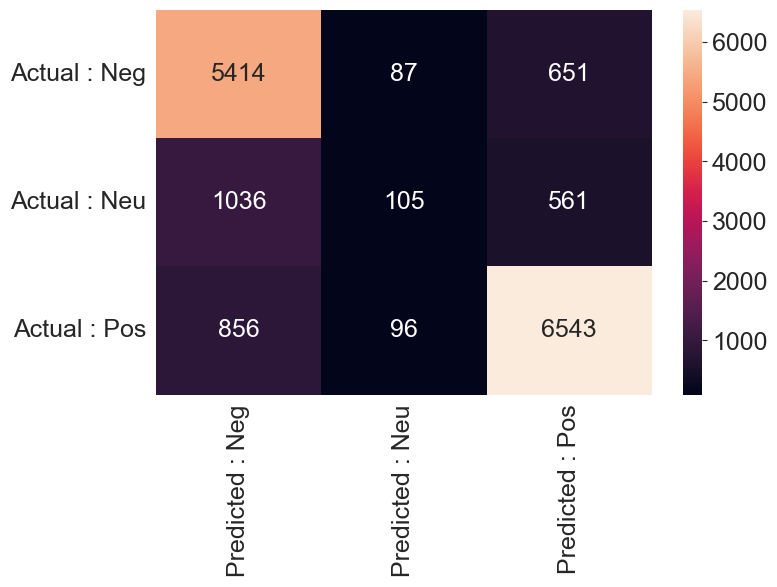

----------------------------------------------------------------------


In [66]:
report(final_lr, model_name="Logistic Regression", i=1)

- ### SVM

In [67]:
final_svm=Pipeline([("Vect",TfidfVectorizer()),
               ("model",LinearSVC())])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      7243
           1       0.06      0.31      0.10       310
           2       0.87      0.83      0.85      7796

    accuracy                           0.78     15349
   macro avg       0.60      0.63      0.58     15349
weighted avg       0.85      0.78      0.81     15349

----------------------------------------------------------------------
Training Accuracy Score = 0.8615020415254974
Testing Accuracy Score = 0.7759463157208939
Cross Validation Score = 0.7731517391431096
----------------------------------------------------------------------
Confusion Matrix:


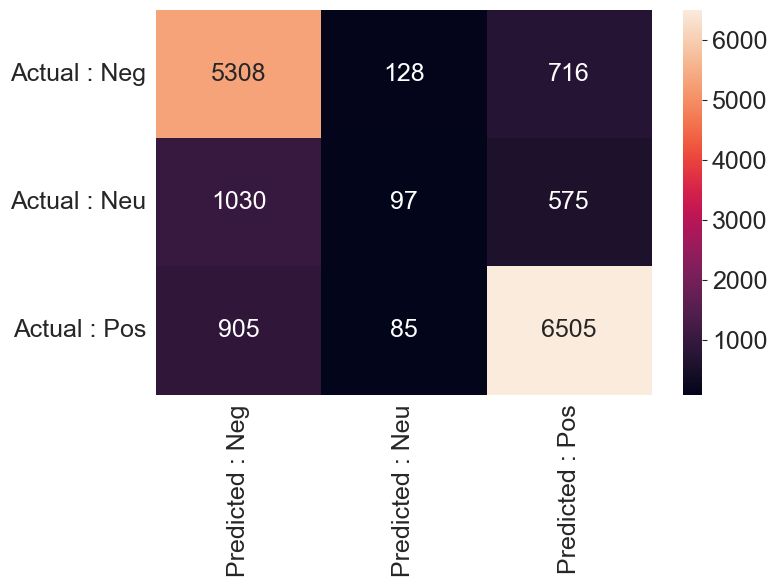

----------------------------------------------------------------------


In [68]:
final_svm.fit(X_train, y_train)

report(final_svm, model_name="SVM", i=2)


- ### Decision Tree

In [69]:
final_dt=Pipeline([("Vect",TfidfVectorizer()),
               ("model",DecisionTreeClassifier(max_depth=11))])
final_dt.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', DecisionTreeClassifier(max_depth=11))])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      9198
           1       0.01      0.18      0.03       135
           2       0.67      0.83      0.74      6016

    accuracy                           0.69     15349
   macro avg       0.53      0.54      0.50     15349
weighted avg       0.80      0.69      0.72     15349

----------------------------------------------------------------------
Training Accuracy Score = 0.712687863782469
Testing Accuracy Score = 0.6899472278324321
Cross Validation Score = 0.6893405187895081
----------------------------------------------------------------------
Confusion Matrix:


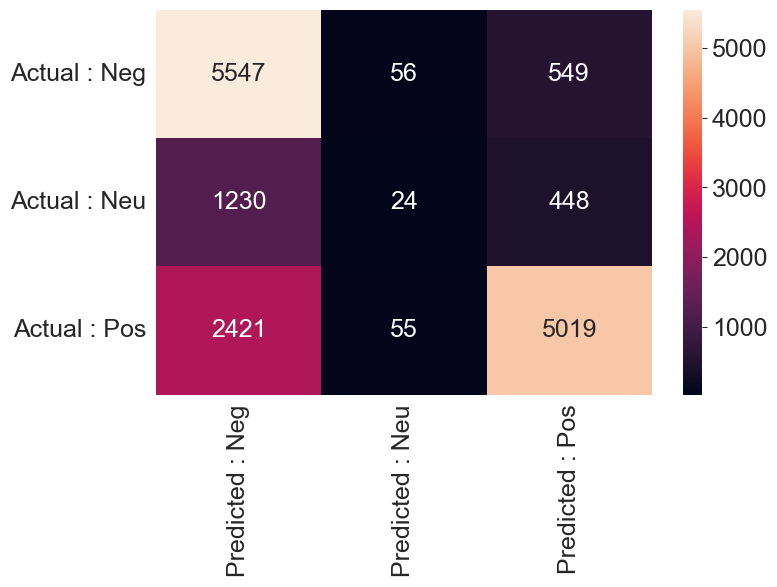

----------------------------------------------------------------------


In [70]:
report(final_dt, model_name="Decision Tree", i=3)

- ### Random Forest

In [71]:
final_rf=Pipeline([("Vect",TfidfVectorizer()),
               ("model",RandomForestClassifier(n_estimators=77, max_depth=17))])
final_rf.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model',
                 RandomForestClassifier(max_depth=17, n_estimators=77))])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      5323
           1       0.00      0.00      0.00         0
           2       0.92      0.68      0.78     10026

    accuracy                           0.70     15349
   macro avg       0.52      0.47      0.49     15349
weighted avg       0.82      0.70      0.75     15349

----------------------------------------------------------------------
Training Accuracy Score = 0.7191816523325515
Testing Accuracy Score = 0.7021955827741221
Cross Validation Score = 0.6987011535102545
----------------------------------------------------------------------
Confusion Matrix:


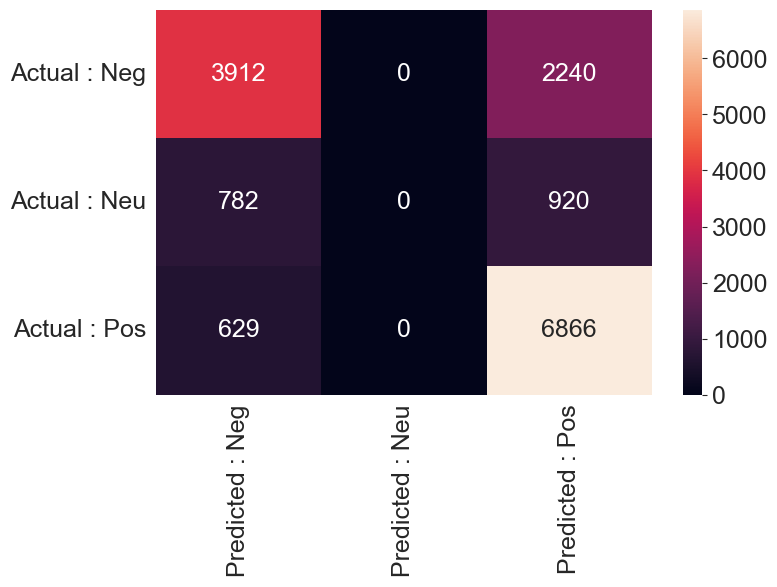

----------------------------------------------------------------------


In [72]:
report(final_rf, model_name="Random Forest", i=4)

- ### GB

In [73]:
final_gb=Pipeline([("Vect",TfidfVectorizer()),
               ("model",GradientBoostingClassifier())])
final_gb.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', GradientBoostingClassifier())])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      7233
           1       0.01      0.32      0.02        50
           2       0.85      0.79      0.82      8066

    accuracy                           0.75     15349
   macro avg       0.56      0.61      0.53     15349
weighted avg       0.84      0.75      0.79     15349

----------------------------------------------------------------------
Training Accuracy Score = 0.7590782729563027
Testing Accuracy Score = 0.7500814385301974
Cross Validation Score = 0.749956479321451
----------------------------------------------------------------------
Confusion Matrix:


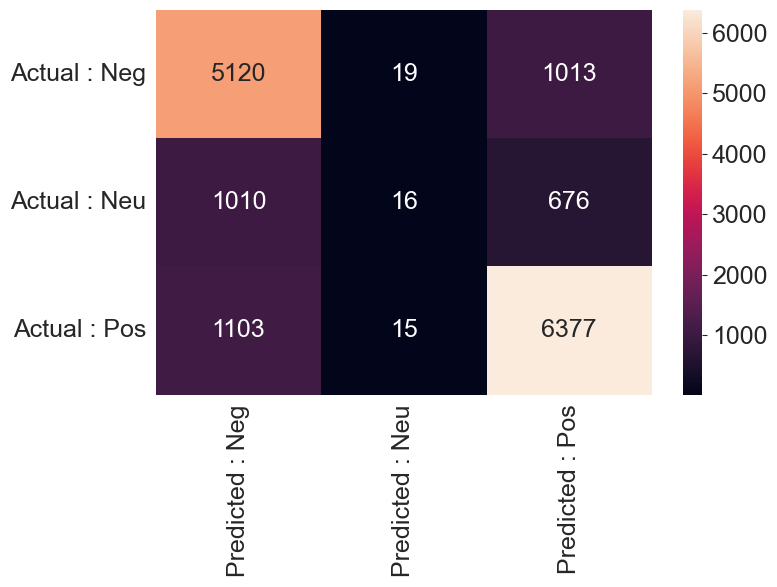

----------------------------------------------------------------------


In [74]:
report(final_gb, model_name="Gradient Boosting", i=5)

- ### SGD

In [75]:
final_sgd=Pipeline([("Vect",TfidfVectorizer()),
               ("model",SGDClassifier())])
final_sgd.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()), ('model', SGDClassifier())])

----------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      7605
           1       0.00      0.00      0.00         0
           2       0.87      0.85      0.86      7744

    accuracy                           0.79     15349
   macro avg       0.59      0.52      0.55     15349
weighted avg       0.89      0.79      0.83     15349

----------------------------------------------------------------------
Training Accuracy Score = 0.8000608113977934
Testing Accuracy Score = 0.787282559124373
Cross Validation Score = 0.7850967903475985
----------------------------------------------------------------------
Confusion Matrix:


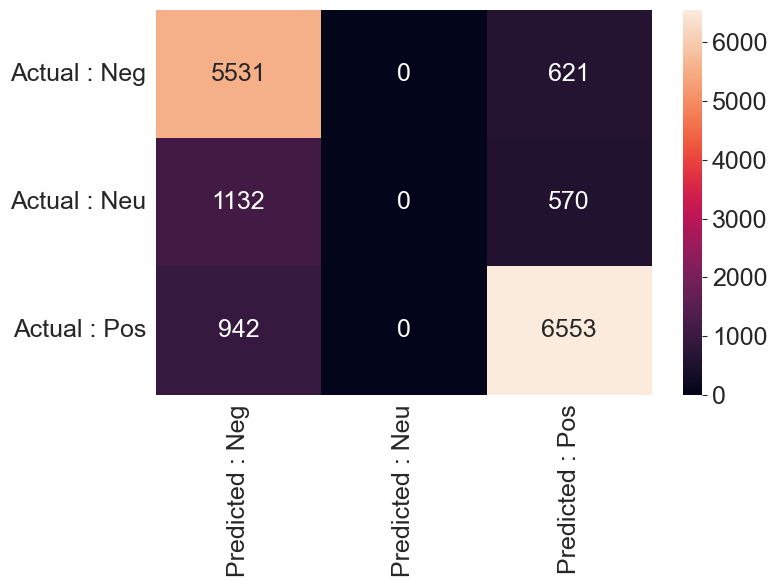

----------------------------------------------------------------------


In [76]:
report(final_sgd, model_name="SGD", i=6)

## Conclusion

In [77]:
acc

Model  Training Accuracy  Testing Accuracy  \
1  Logistic Regression           0.815937          0.785849   
2                  SVM           0.861502          0.775946   
3        Decision Tree           0.712688          0.689947   
4        Random Forest           0.719182          0.702196   
5    Gradient Boosting           0.759078          0.750081   
6                  SGD           0.800061          0.787283   

   Cross validation Score  
1                0.782816  
2                0.773152  
3                0.689341  
4                0.698701  
5                0.749956  
6                0.785097

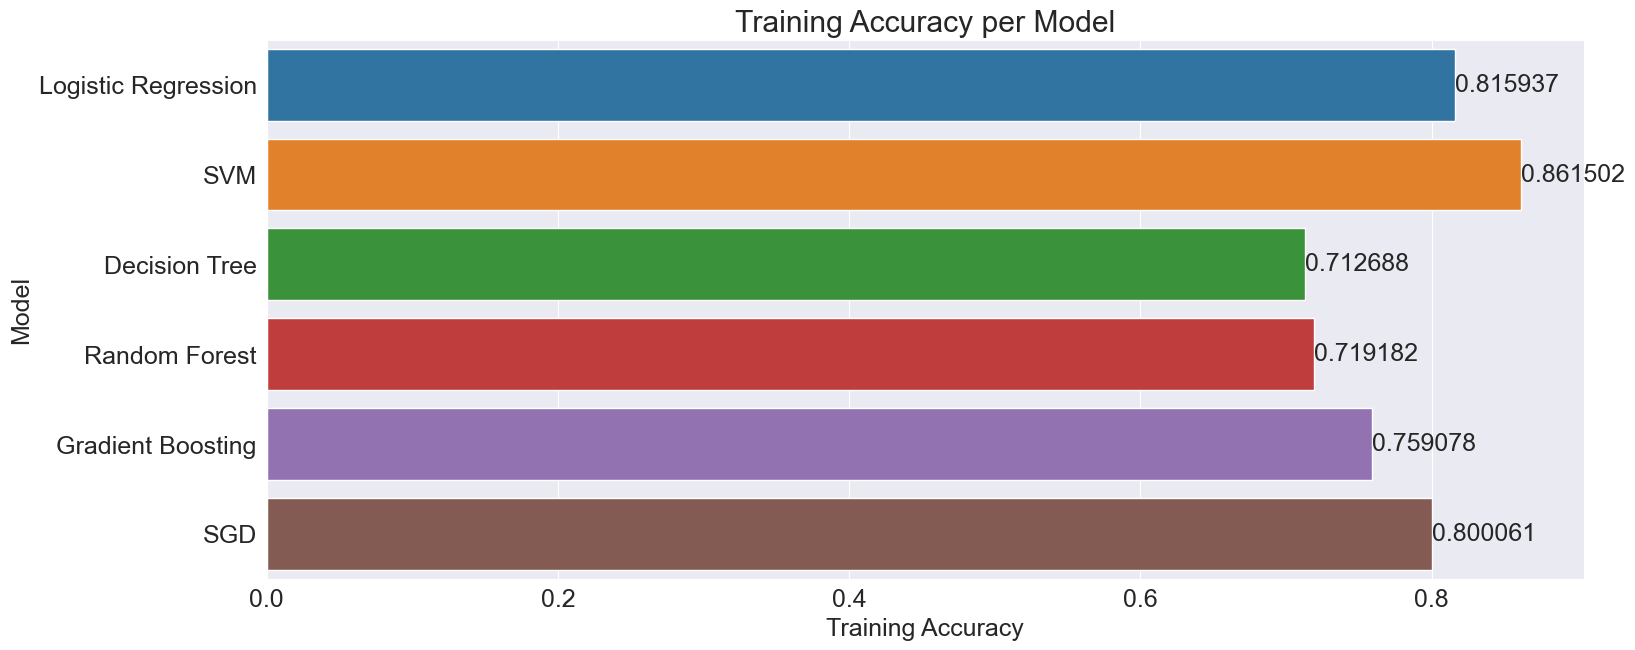

In [93]:
ax = sns.barplot(y='Model', x='Training Accuracy', data=acc)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Training Accuracy per Model')
plt.show()

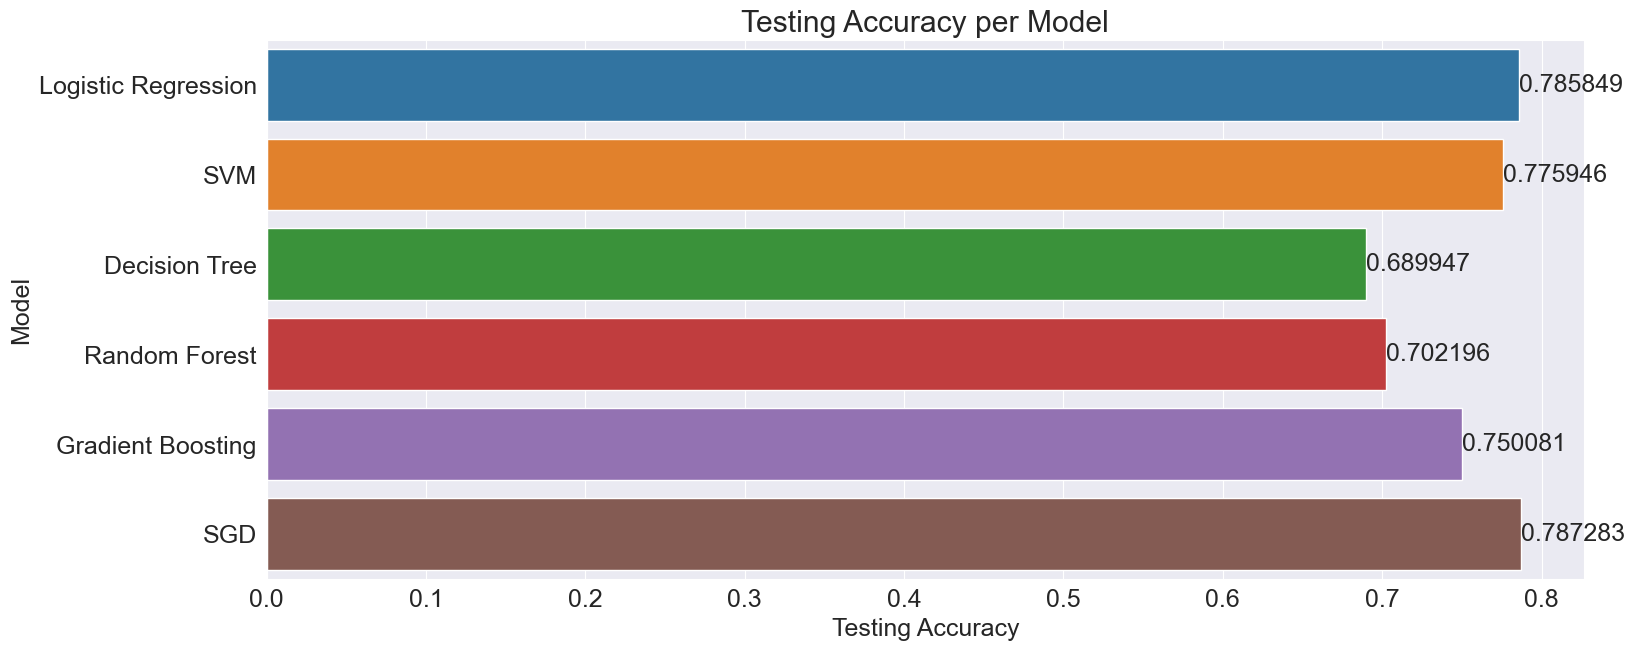

In [94]:
ax=sns.barplot(y='Model',x='Testing Accuracy',data=acc)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Testing Accuracy per Model')
plt.show()

Dari barplot di atas, kami mengamati bahwa SVM memiliki akurasi pelatihan tertinggi di antara semua model, yaitu 0,86_

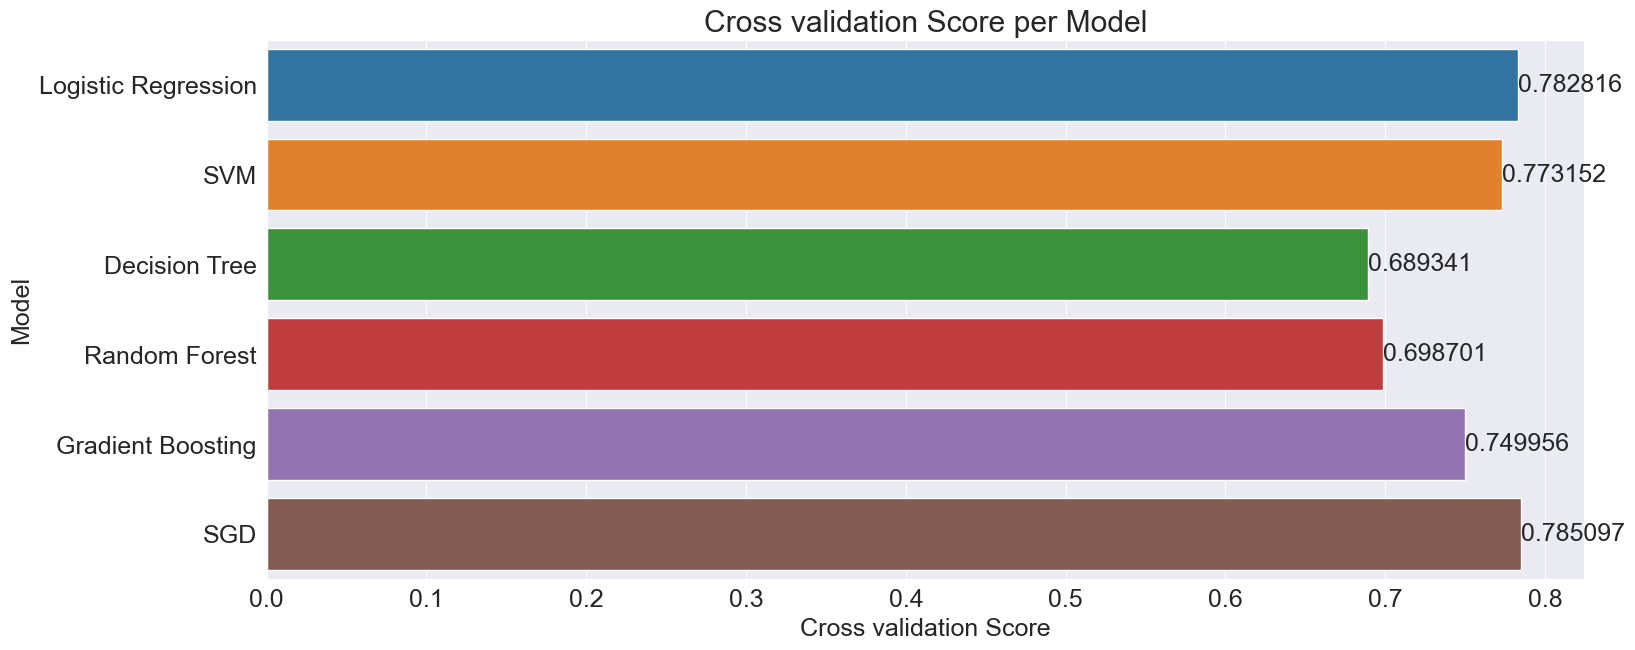

In [95]:
ax=sns.barplot(y='Model',x='Cross validation Score',data=acc)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Cross validation Score per Model')
plt.show()

## Prediction

In [101]:
def predict(sen):
    processed_text = preprocess(sen, remove_emoji=True)
    processed_text = expand_contractions(processed_text, contractions_dict)
    processed_text = " ".join([word for word in processed_text.split() if word not in stop_words])
    processed_text = " ".join([lemmat.lemmatize(word) for word in processed_text.split()])

    pred = final_lr.predict([processed_text])
    if pred[0] == 1:
        print("NEUTRAL")
    elif pred[0] == 2:
        print("POSITIVE")
    else:
        print("NEGATIVE")


In [102]:
df2['Review'].tail(40)

61554    thought good first ability play previous song ...
61555    paying user experience ok artist get tiny perc...
61556    spotify main sort music issue keep playing son...
61557    app open randomly open apps love spotify liste...
61558    spotify load album podcast episode tried clear...
61559    best music listening program ever made thing l...
61560    app extremely hard use frustrating cant even p...
61561    many add many time get 5 add right startup app...
61562    terrible administration service lost debit car...
61563    car mode vanished use phone landscape motorcyc...
61564    normally ok apparent reason spotify move data ...
61565    forward backward button really broken video im...
61566    much ad ad also longnot 1 2 several ad played ...
61567    like changed listen full song playlist shuffle...
61568    using spotify premium biggest dissapointment w...
61569    love spotify laptop temporarily away 3 month t...
61570    nice app premium subscription show add ok show.

In [103]:
predict("great music service audio high quality app")

POSITIVE


In [104]:
predict("hav music like super 🙌")

POSITIVE


In [105]:
predict("cannot use app properly working refresh phone")

NEGATIVE


In [106]:
predict("app extremely hard use frustrating")

NEGATIVE
